# Import DataSet

In [1]:
from sklearn.datasets import make_classification

# Generate the dataset

In [26]:
X,Y = make_classification(n_samples=1000,n_classes=2,n_features=5,n_redundant=0,random_state=1)

In [27]:
X.shape

(1000, 5)

In [28]:
Y.shape

(1000,)

# Data Split (70/30 ratio)

# import library

In [29]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)

In [50]:
X_train.shape,Y_train.shape

((700, 5), (700,))

In [51]:
X_test.shape,Y_test.shape

((300, 5), (300,))

# Building the Classficiaton Models

In [56]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [68]:
names = ["Nearest_Neighbours", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Tress", "Random_Forest", "Neural_Net",
         "AdaBoost", "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear",C=0.025),
    SVC(kernel="poly",degree=3,C=0.025),
    SVC(kernel="rbf",C=1,gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty='l2')
]


# Build Model, Apply Model on Test Data & Record Accuracy Scores

In [70]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [71]:
scores

[0.8566666666666667,
 0.8533333333333334,
 0.8,
 0.83,
 0.87,
 0.8433333333333334,
 0.8533333333333334,
 0.84,
 0.86,
 0.8733333333333333,
 0.8333333333333334,
 0.8633333333333333,
 0.8533333333333334,
 0.8166666666666667]

# Analysis of Model Performance
#Import Library

In [72]:
import pandas as pd
import seaborn as sns

# Create data frame of model Performance

In [74]:
df = pd.DataFrame()
df['Name'] = names
df['Scores'] = scores
df

,Name,Scores
0,Nearest_Neighbours,0.856667
1,Linear_SVM,0.853333
2,Polynomial_SVM,0.800000
3,RBF_SVM,0.830000
4,Gaussian_Process,0.870000
5,Gradient_Boosting,0.843333
6,Decision_Tree,0.853333
7,Extra_Tress,0.840000
8,Random_Forest,0.860000
9,Neural_Net,0.873333


# Adding Colours to the data frame

In [78]:
cm = sns.dark_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Name,Scores
0,Nearest_Neighbours,0.856667
1,Linear_SVM,0.853333
2,Polynomial_SVM,0.800000
3,RBF_SVM,0.830000
4,Gaussian_Process,0.870000
5,Gradient_Boosting,0.843333
6,Decision_Tree,0.853333
7,Extra_Tress,0.840000
8,Random_Forest,0.860000
9,Neural_Net,0.873333


# Bar Plot of model Performance

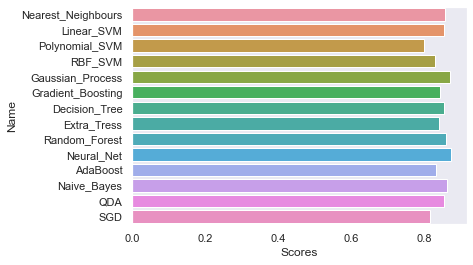

In [86]:
sns.set(style="dark")
ax = sns.barplot(y="Name",x="Scores",data = df)